In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


## Carga de datasets

In [3]:
siniestros_hechos = pd.read_csv('../data/processed/siniestros_hechos.csv')
siniestros_victimas = pd.read_csv('../data/processed/siniestros_victimas.csv')

In [22]:
siniestros_hechos.head()

,Id,N_Victimas,Fecha,Franja_Hora,Tipo_Calle,Calle,Cruce,Comuna,Longitud,Latitud,Participantes,Victima,Acusado,Dataset,semaforo_30m,semaforo_15m
0,2016-0001,1,2016-01-01,4,AVENIDA,PIEDRA BUENA AV.,True,8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,homicidio,True,True
1,2016-0002,1,2016-01-02,1,GRAL PAZ,"PAZ, GRAL. AV.",True,9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,homicidio,False,False
2,2016-0003,1,2016-01-03,7,AVENIDA,ENTRE RIOS AV.,False,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,homicidio,False,False
3,2016-0005,1,2016-01-21,5,AVENIDA,SAN JUAN AV.,True,1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,homicidio,True,True
4,2016-0008,1,2016-01-24,18,AVENIDA,27 DE FEBRERO AV.,True,8,-58.444513,-34.684759,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,homicidio,False,False


In [43]:
siniestros_hechos.dtypes

Id                       object
N_Victimas                int64
Fecha            datetime64[ns]
Franja_Hora               int64
Tipo_Calle               object
Calle                    object
Cruce                      bool
Comuna                    int64
Longitud                float64
Latitud                 float64
Participantes            object
Victima                  object
Acusado                  object
Dataset                  object
semaforo_30m               bool
semaforo_15m               bool
dtype: object

In [44]:
siniestros_victimas.dtypes

Id_Hecho    object
Sexo        object
Edad        object
dtype: object

## siniestros_hechos y siniestros_victimas

In [42]:
siniestros_hechos.describe()

,N_Victimas,Fecha,Franja_Hora,Comuna,Longitud,Latitud
count,22897.000000,22897,22897.000000,22897.000000,22897.000000,22897.000000
mean,1.159016,2020-05-11 16:07:34.068218624,13.714242,7.916103,-58.442397,-34.612280
min,1.000000,2016-01-01 00:00:00,0.000000,1.000000,-58.531114,-34.705250
25%,1.000000,2019-07-10 00:00:00,10.000000,4.000000,-58.477042,-34.632930
50%,1.000000,2020-03-10 00:00:00,14.000000,8.000000,-58.441801,-34.613051
75%,1.000000,2021-03-29 00:00:00,18.000000,12.000000,-58.405162,-34.591189
max,16.000000,2021-12-31 00:00:00,23.000000,15.000000,-58.353456,-34.534654
std,0.546973,NaN,5.462827,4.580735,0.044398,0.031604


In [41]:
siniestros_victimas.describe()

,Id_Hecho,Sexo,Edad
count,23786,23786,23786
unique,20787,2,100
top,LC-2019-0188476,MASCULINO,28
freq,16,16101,829


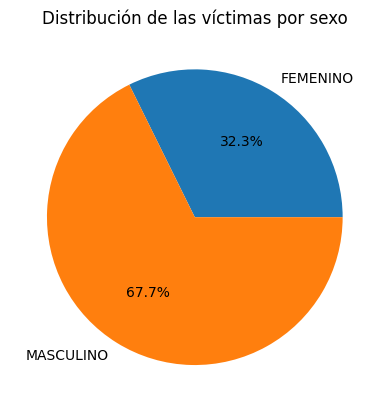

In [4]:
# Recuento de las víctimas por sexo
victimas_por_sexo = siniestros_victimas.groupby("Sexo").size()

# Creación del gráfico circular
plt.pie(victimas_por_sexo, labels=victimas_por_sexo.index, autopct="%1.1f%%")
plt.title("Distribución de las víctimas por sexo")
plt.show()


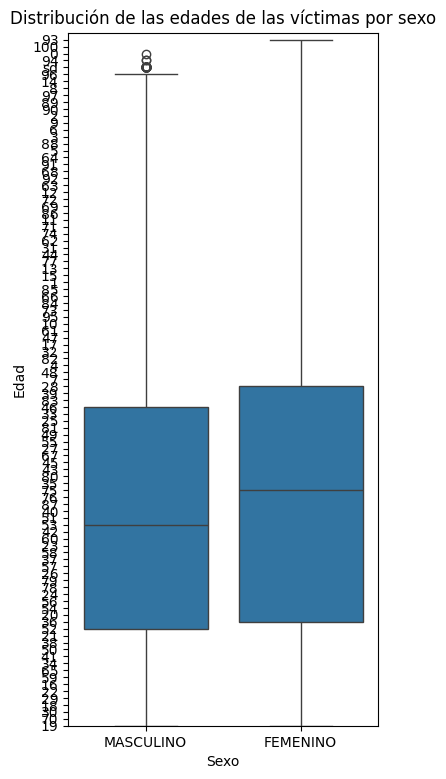

In [12]:
plt.figure(figsize=(4,9))
ax = sns.boxplot(x="Sexo", y="Edad", data=siniestros_victimas)

# Set the limits of the y-axis
ax.set_ylim(0, 100)

# Set the title of the plot
ax.set_title("Distribución de las edades de las víctimas por sexo")

# Show the plot
plt.show()

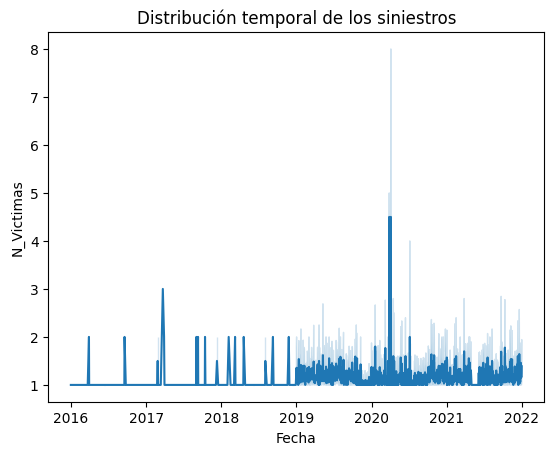

In [16]:
# Conversión de la columna Fecha a formato datetime
siniestros_hechos["Fecha"] = pd.to_datetime(siniestros_hechos["Fecha"])

# Gráfico de series temporales
sns.lineplot(x="Fecha", y="N_Victimas", data=siniestros_hechos)
plt.title("Distribución temporal de los siniestros")
plt.show()

Text(0.5, 0, 'conteo')

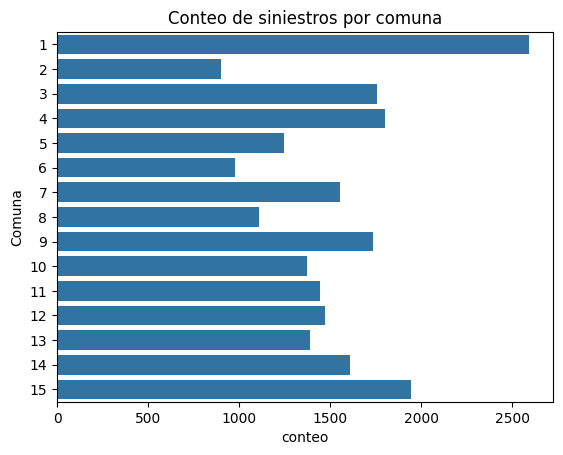

In [15]:
sns.countplot(y='Comuna', data=siniestros_hechos, orient='h')

plt.title('Conteo de siniestros por comuna')
plt.ylabel('Comuna')
plt.xlabel('conteo')


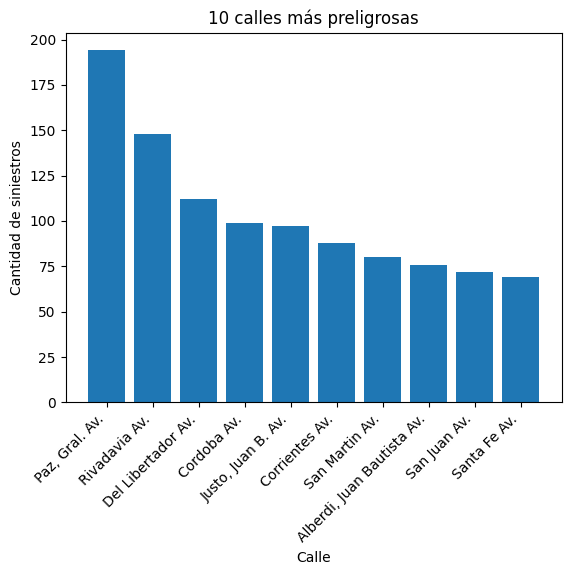

In [18]:
# Filter out 'SD' values from the 'Calle' column
calles_sin_sd = siniestros_hechos['Calle'].replace('SD', np.nan)

# Count the number of non-'SD' values for each street
calles_peligrosas = calles_sin_sd.value_counts().head(10)

# Create the bar plot
plt.bar(calles_peligrosas.index, calles_peligrosas.values)
plt.xlabel('Calle')
plt.ylabel('Cantidad de siniestros')
plt.title('10 calles más preligrosas')
plt.xticks(rotation=45, ha='right')
plt.show()

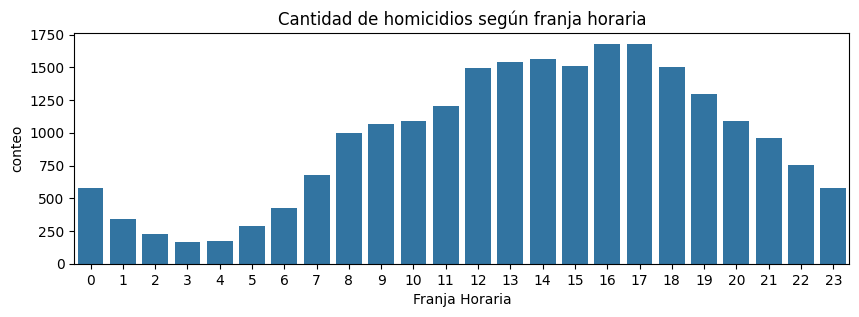

In [25]:
  # Cambiar el tamaño y la forma de la figura
fig, ax = plt.subplots(figsize=(10, 3))

# Se crea un gráfico de conteo para la variable "Franja_Horaria"
sns.countplot(x="Franja_Hora", data=siniestros_hechos, ax=ax)

# Se agrega un título al gráfico
plt.title("Cantidad de homicidios según franja horaria")
plt.ylabel('conteo')
plt.xlabel('Franja Horaria')

# Se muestra el gráfico
plt.show()

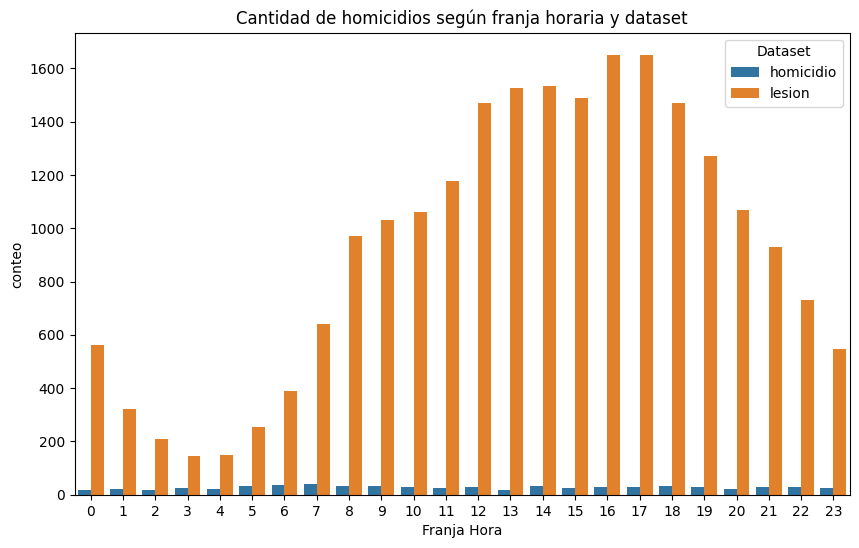

In [37]:
# Create a new figure with a larger picture frame
fig, ax = plt.subplots(figsize=(10, 6))

# Create the stacked bar plot
sns.countplot(x='Franja_Hora', hue='Dataset', data=siniestros_hechos, order=grouped.Franja_Hora.unique(), ax=ax)

# Set the title and labels of the plot
ax.set_title("Cantidad de homicidios según franja horaria y dataset")
ax.set_ylabel('conteo')
ax.set_xlabel('Franja Hora')

# Show the plot
plt.show()